<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/Proiect/Analiza_S%26P500_%2B_Meta_Proiect_SERII_TIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caiet lucru analiza S&P 500 (2015-2025)**

Cerinte:

o   Prezentarea problemei

o   Surse de date (se extrag două serii de timp, posibil interdependente)

o   Modele econometrice folosite

    - estimarea unui model univariat de timp pentru fiecare serie de timp

    - estimarea unui model multivariat pentru interdependența dintre ele

o   Concluzii și interpretări

  În realizarea proiectului se va avea în vederea ilustrarea următoarelor concepte de analiză a seriilor de timp:

1.      Modele cu trend determinist sau stochastic

2.      Serii staționare

3.      Modele ARMA-ARIMA-SARIMA

4.      Predicția punctuală și predicția pe interval de încredere

5.      Modele de cointegrare și modele VAR.


In [1]:
# Instalează pachetele necesare (rulat o singură dată)
!pip3 install yfinance statsmodels arch seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.3 MB/s eta 0:00:00


In [42]:
# Importuri
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from google.colab import files
from arch.unitroot import ADF, PhillipsPerron, KPSS
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [11]:
#Fac un dataframe cu fisierul dat
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

#Verific Df-ul
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [19]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

#Afisez
sp500_log_returns.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-24,-0.000711,-0.005347,-0.002391,0.001221,0.079516,0.001221
2015-11-25,-0.000535,0.007703,0.002339,-0.000129,-0.308755,-0.000129
2015-11-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-27,0.000139,-0.001041,-0.000230,0.000593,-0.665240,0.000593
2015-11-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
#Descarc datele OHLC pentru ticker-ul META (Perioada similara cu cea a S&P500 din csv)
meta = yf.download('META', start='2015-11-23', end='2025-11-20')
meta.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2015-11-23,106.448303,106.965868,105.582389,106.687183,19897200
2015-11-24,105.243980,105.990462,103.900315,105.502763,23577300
2015-11-25,104.915527,106.099940,104.606976,105.831210,15150800
2015-11-27,104.955338,105.462947,104.368109,105.283791,5913100
2015-11-30,103.751015,105.602290,103.263315,105.343508,20383200


In [21]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
meta_log_returns = np.log(meta / meta.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()
meta_log_returns.head()

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2015-11-24,-0.011378,-0.009161,-0.016060,-0.011164,0.169705
2015-11-25,-0.003126,0.001032,0.006778,0.003108,-0.442231
2015-11-27,0.000379,-0.006022,-0.002286,-0.005186,-0.940883
2015-11-30,-0.011541,0.001320,-0.010642,0.000567,1.237541
2015-12-01,0.027254,0.009848,0.007203,-0.009588,0.111255


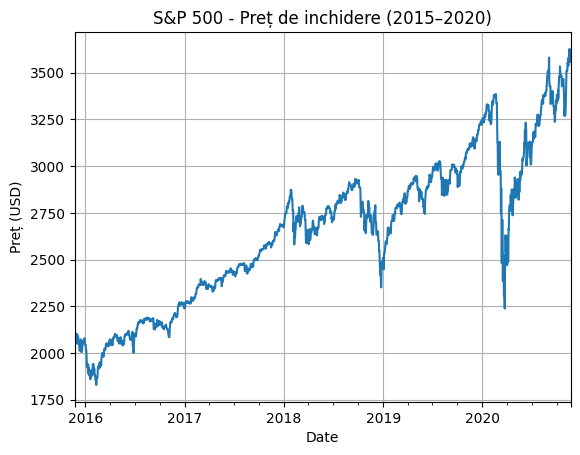

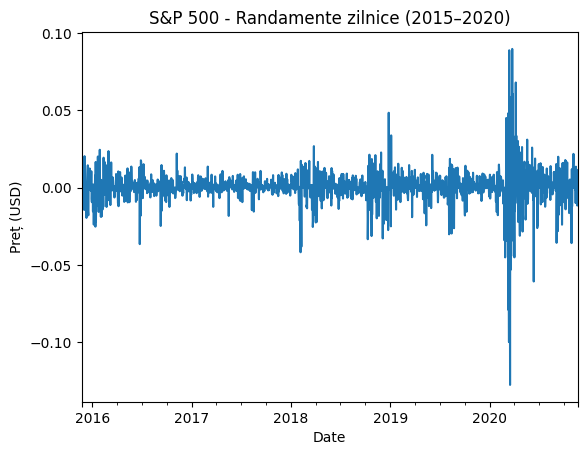

In [27]:
# Plot - Preț ajustat real
sp500['Close'].plot(title='S&P 500 - Preț de inchidere (2015–2020)')
plt.ylabel("Preț (USD)")
plt.grid(True)
plt.show()

# Plot - Preț ajustat randamente logartimice
sp500_log_returns['Close'].plot(title='S&P 500 - Randamente zilnice (2015–2020)')
plt.ylabel("Preț (USD)")
plt.show()

# **📈 Evoluția S&P 500 (2015–2020)**

**🔹 Observații tehnice:**

Trend general ascendent între 2016 și începutul lui 2020.

Corecții semnificative la finalul lui 2018 și în martie 2020.

Volatilitate crescută în perioadele de incertitudine economică.

**🔹 Evenimente economice relevante:**

2015–2016: Îngrijorări legate de economia Chinei și scăderea prețului petrolului.

2018: Tensiuni comerciale între SUA și China; majorarea ratelor dobânzilor de către FED.

2020: Pandemia COVID-19 a provocat o scădere rapidă de aproximativ 34% în martie, urmată de o revenire susținută de stimulente fiscale și monetare.

***⏩⏩⏩Deoarece trendul este stochastic (Seria urcă sau coboară la întâmplare, cu "salturi" de la o perioadă la alta) am aplicat diferentierea prin logaritmarea randametelor pentru a obtine un trend deterministic.***

# **📊 Randamente zilnice S&P 500**

**🔹 Observații tehnice:**

Randamente relativ stabile în perioadele de creștere economică.

Spike-uri semnificative în perioadele de criză, indicând volatilitate ridicată.

Distribuție leptokurtică: frecvență crescută a valorilor extreme.

**🔹 Interpretare:**

Randamentele zilnice sunt în general staționare, dar prezintă heteroscedasticitate în perioadele de stres economic.

Modelarea volatilității poate fi eficient realizată prin modele ARCH/GARCH.

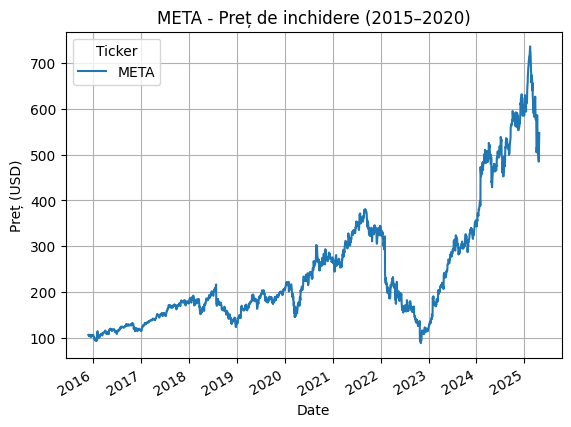

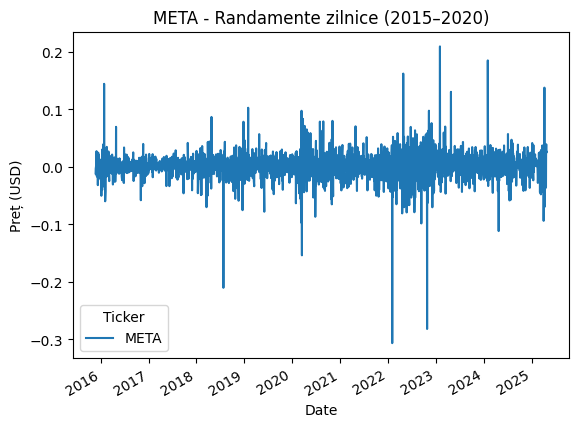

In [28]:
# Plot - Preț ajustat real
meta['Close'].plot(title='META - Preț de inchidere (2015–2020)')
plt.ylabel("Preț (USD)")
plt.grid(True)
plt.show()

#Plot pentru log randamente
meta_log_returns['Close'].plot(title='META - Randamente zilnice (2015–2020)')
plt.ylabel("Preț (USD)")
plt.show()

# **📈 Evoluția META (2015–2020)**

**🔹 Observații tehnice:**

Trend ascendent stabil până în 2021, urmat de volatilitate ridicată.

Corecție masivă în 2022, apoi revenire accelerată în 2023–2024.

Volatilitate extrem de mare la sfârșitul perioadei (2024–2025).

**🔹 Evenimente economice relevante:**

2021: Creștere datorată expansiunii platformelor Meta și optimismului tehnologic.

2022: Corecție severă cauzată de scăderea veniturilor, criza publicității online și incertitudini macroeconomice (războiul Rusia-Ucraina, inflație ridicată).

2023–2024: Revenire puternică pe fondul investițiilor în AI și eficientizării operaționale.

2025: Volatilitate crescută posibil asociată cu ajustări de piață și politici restrictive.

***⏩⏩⏩Deoarece trendul este stochastic (Seria urcă sau coboară la întâmplare, cu "salturi" de la o perioadă la alta) am aplicat diferentierea prin logaritmarea randametelor pentru a obtine un trend deterministic.***

# **📊 Randamente zilnice META**

**🔹 Observații tehnice:**

Randamente relativ stabile până în 2021.

Spike-uri majore în 2022 și 2023, indicând șocuri de piață.

Distribuție leptokurtică: valori extreme mai frecvente decât într-o distribuție normală.

**🔹 Interpretare:**

Randamentele zilnice sunt în general staționare, dar volatilitatea variază puternic în crize.

Modelarea volatilității este recomandată folosind modele ARCH/GARCH pentru a surprinde dinamica variației randamentelor.

In [77]:
def analiza_trend(series, title=''):
    print(f'=== Analiza trend pentru {title} ===\n')

    # 2. Test ADF
    adf = ADF(series, trend='ct')
    print(adf.summary(),'\n')
    adf_stationary = adf.pvalue < 0.05

    # 3. Test KPSS
    kpss_test = KPSS(series, trend='ct')
    print(kpss_test.summary(),'\n')
    kpss_stationary = kpss_test.pvalue > 0.05

    # 4. Test Phillips-Perron
    pp = PhillipsPerron(series, trend='ct')
    print(pp.summary(),'\n')
    pp_stationary = pp.pvalue < 0.05

    # 5. Concluzie automată
    print('--- Concluzie ---')
    if adf_stationary and pp_stationary and kpss_stationary:
        print(f'Seria {title} are un trend determinist.')
    elif not adf_stationary and not pp_stationary and not kpss_stationary:
        print(f'Seria {title} are un trend stochastic.')
    else:
        print(f'Seria {title} necesită o analiză mai detaliată (rezultate mixte între teste).')
    print('=============================\n')

analiza_trend(sp500['Close'], title='S&P 500 - Close')
analiza_trend(sp500_log_returns['Close'], title='S&P 500 - Close')

=== Analiza trend pentru S&P 500 - Close ===

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.173
P-value                         0.005
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.209
P-value                         0.012
Lags                               27
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.149
P-value                         0.005
Lags                               25
-------------------

In [78]:
analiza_trend(meta['Close'], title='S&P 500 - Close')
analiza_trend(meta_log_returns['Close'], title='S&P 500 - Close')

=== Analiza trend pentru S&P 500 - Close ===

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.420
P-value                         0.855
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.667
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.553
P-value                         0.810
Lags                               27
-------------------

<Figure size 1000x500 with 0 Axes>

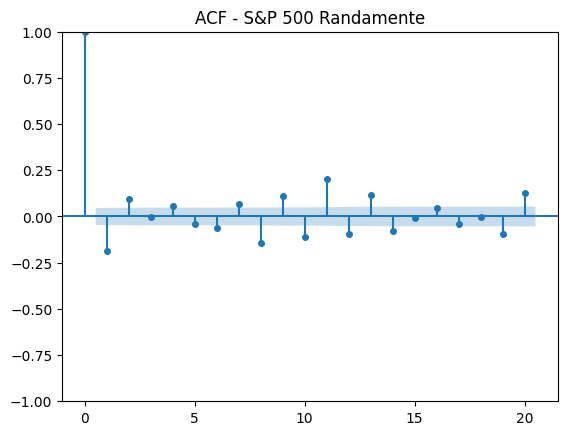

<Figure size 1000x500 with 0 Axes>

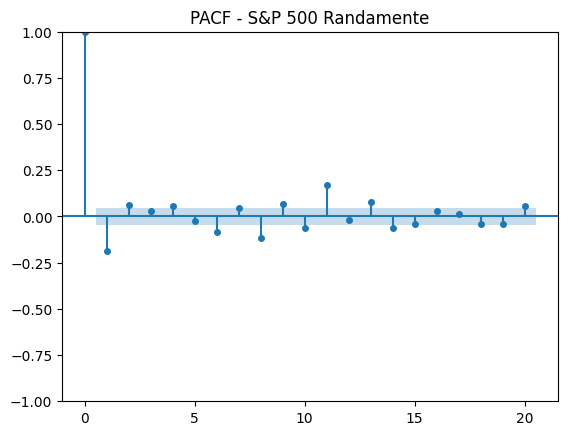

In [47]:
# ACF (pentru q – partea MA)
plt.figure(figsize=(10, 5))
plot_acf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p – partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('PACF - S&P 500 Randamente')
plt.show()

<Figure size 1000x500 with 0 Axes>

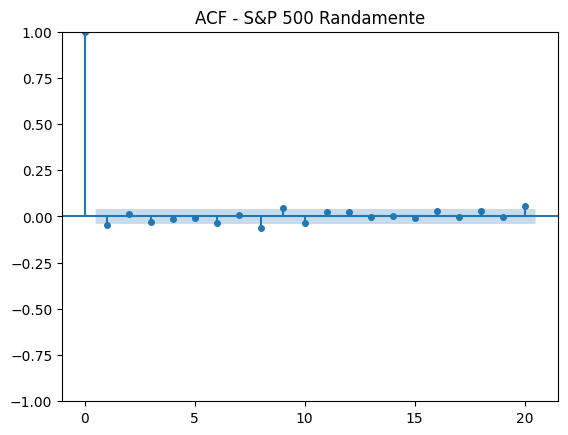

<Figure size 1000x500 with 0 Axes>

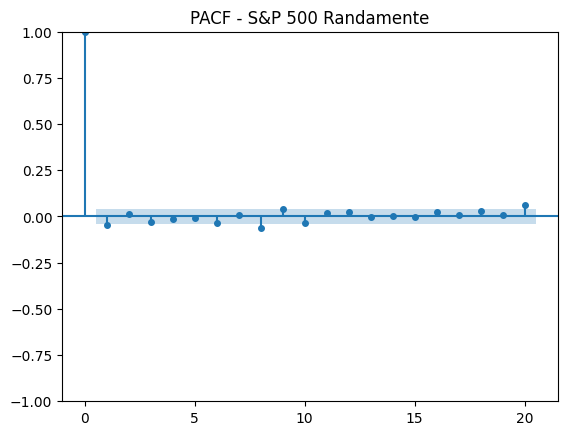

In [48]:
# ACF (pentru q – partea MA)
plt.figure(figsize=(10, 5))
plot_acf(meta_log_returns['Close'], lags=20, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p – partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(meta_log_returns['Close'], lags=20, markersize=4)
plt.title('PACF - S&P 500 Randamente')
plt.show()

In [84]:
#META
model_meta_arma = ARIMA(meta['Close'], order=(1, 0, 1))
fitted = model_meta_arma.fit()
print(fitted.summary())


model_meta_arima = ARIMA(meta_log_returns['Close'], order=( 1, 0, 1))
fitted = model_meta_arima.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   META   No. Observations:                 2369
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7859.080
Date:                Sun, 27 Apr 2025   AIC                          15726.160
Time:                        20:21:08   BIC                          15749.241
Sample:                             0   HQIC                         15734.562
                               - 2369                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.1913    543.819      0.455      0.649    -818.674    1313.057
ar.L1          0.9997      0.001   1251.007      0.000       0.998       1.001
ma.L1         -0.0517      0.011     -4.603      0.0

In [85]:
#S&P500
model_sp500 = ARIMA(sp500_log_returns['Close'], order=(2, 0, 2))
fitted = model_sp500.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1824
Model:                 ARIMA(2, 0, 2)   Log Likelihood                5816.010
Date:                Sun, 27 Apr 2025   AIC                         -11620.021
Time:                        20:21:51   BIC                         -11586.968
Sample:                    11-24-2015   HQIC                        -11607.828
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.181      0.238      -0.000       0.001
ar.L1         -0.0852      0.214     -0.397      0.691      -0.505       0.335
ar.L2         -0.0695      0.081     -0.862      0.3

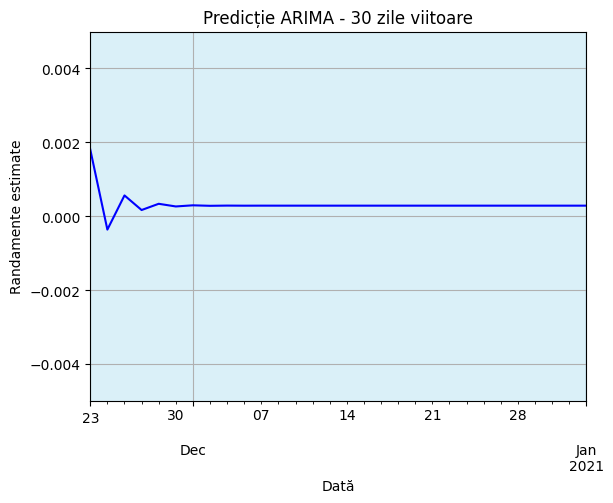

In [51]:
forecast = fitted.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Setăm index cu date reale
last_date = sp500_log_returns['Close'].index[-1]
forecast_df.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Plot mai clar
forecast_df['mean'].plot(title='Predicție ARIMA - 30 zile viitoare', color='blue')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='skyblue', alpha=0.3)
plt.ylabel('Randamente estimate')
plt.xlabel('Dată')
plt.grid(True)
plt.ylim(-0.005, 0.005)  # zoom pe variație mică (~±0.5%)
plt.show()


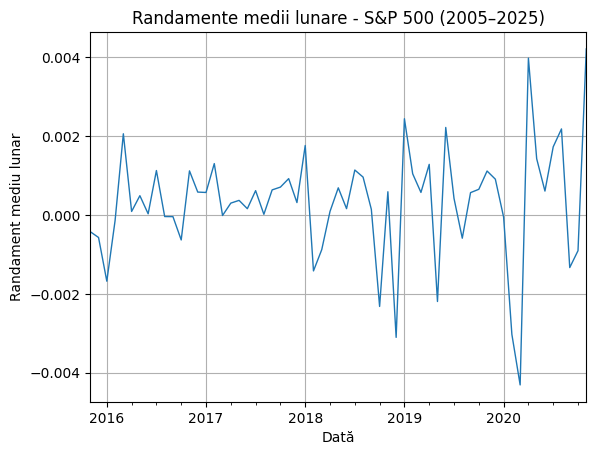

In [53]:
# Agregăm randamentele la nivel de lună calendaristică
sp500_monthly_returns = sp500_log_returns['Close'].resample('M').mean()

# Line chart pentru întreaga perioadă 2005–2025
sp500_monthly_returns.plot(title='Randamente medii lunare - S&P 500 (2005–2025)', linewidth=1)
plt.ylabel('Randament mediu lunar')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

In [59]:
# Randamente medii trimestriale
quarterly_returns = sp500_log_returns['Close'].resample('Q').mean().dropna()

# SARIMA(p,d,q)(P,D,Q,s) → alegem p=1, d=0, q=1 și sezonalitate s=4 (trimestrială)
model_q = SARIMAX(quarterly_returns, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
results_q = model_q.fit(disp=False)

# Rezumat
print("=== SARIMA pe Randamente Trimestriale ===")
print(results_q.summary())

# Plot evoluție în timp
sp500_quarterly_returns.plot(title='Randamente medii trimestriale - S&P 500 (2005–2025)', linewidth=1.5)
plt.ylabel('Randament mediu trimestrial')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

=== SARIMA pe Randamente Trimestriale ===
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                   21
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                 116.921
Date:                           Sun, 27 Apr 2025   AIC                           -223.843
Time:                                   15:57:38   BIC                           -218.620
Sample:                               12-31-2015   HQIC                          -222.710
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4018      0.519     -0.774      0.439      -1.419       0.616
m

NameError: name 'sp500_quarterly_returns' is not defined

In [60]:
from arch import arch_model

# Pregătire: randamente logaritmice curate
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

# Model GARCH(1,1) fără constantă în media (mean='Zero')
garch_model = arch_model(sp500_log_returns['Close'], vol='GARCH', p=1, q=1, mean='Zero')
garch_fitted = garch_model.fit(disp='off')

# Rezumat
print(garch_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                6482.14
Distribution:                  Normal   AIC:                          -12958.3
Method:            Maximum Likelihood   BIC:                          -12941.7
                                        No. Observations:                 1824
Date:                Sun, Apr 27 2025   Df Residuals:                     1824
Time:                        15:57:45   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0034e-06  5.674e-10   3530.990      0.000 [2.

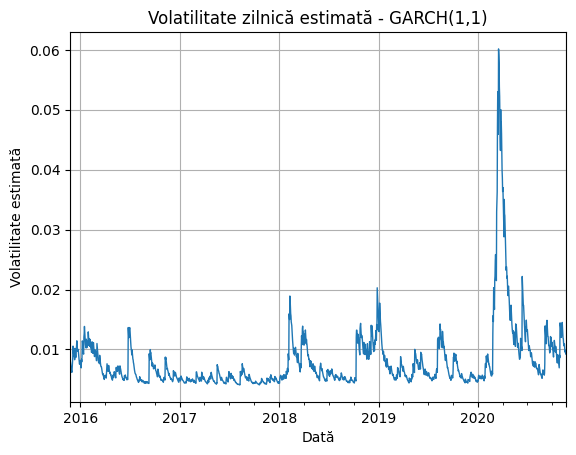

In [61]:
# Plot volatilitate condițională (volatilitatea estimată în fiecare zi)
garch_fitted.conditional_volatility.plot(title='Volatilitate zilnică estimată - GARCH(1,1)', linewidth=1)
plt.ylabel('Volatilitate estimată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

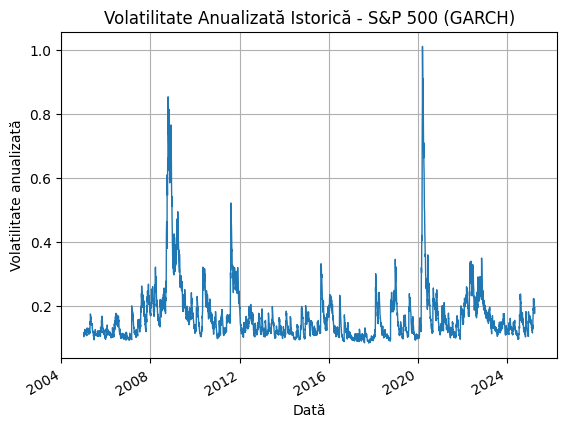

In [ ]:
# Volatilitate anualizată istorică
vol_anualizata_istoric = garch_fitted.conditional_volatility * np.sqrt(252)

# Plot istoric
vol_anualizata_istoric.plot(title='Volatilitate Anualizată Istorică - S&P 500 (GARCH)', linewidth=1)
plt.ylabel('Volatilitate anualizată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

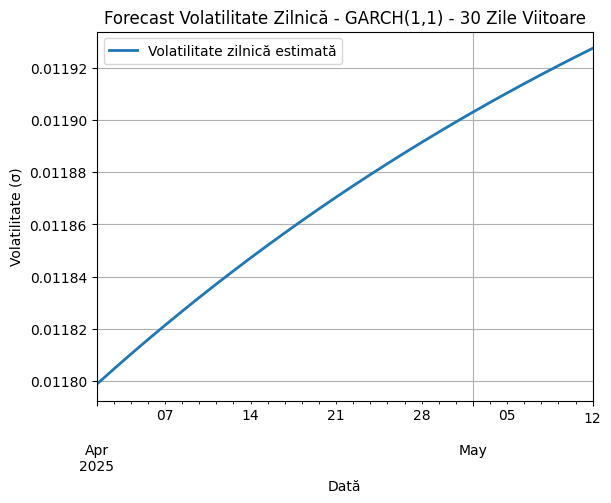

In [ ]:
# Forecast volatilitate pentru 30 de zile viitoare
garch_forecast = garch_fitted.forecast(horizon=30)

# Extragem volatilitatea condițională (deviația standard)
forecast_vol = np.sqrt(garch_forecast.variance.values[-1, :])

# Creăm un index de date pentru următoarele 30 de zile lucrătoare
last_date = sp500_log_returns.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Salvăm într-un DataFrame
forecast_df = pd.DataFrame({
    'Volatilitate zilnică estimată': forecast_vol
}, index=forecast_dates)

# Plot
forecast_df.plot(title='Forecast Volatilitate Zilnică - GARCH(1,1) - 30 Zile Viitoare', linewidth=2)
plt.ylabel('Volatilitate (σ)')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

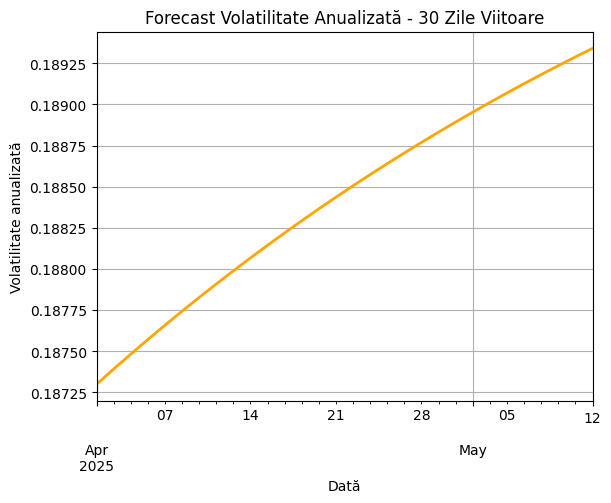

In [ ]:
# Forecast anualizat
forecast_df['Volatilitate anualizată estimată'] = forecast_df['Volatilitate zilnică estimată'] * np.sqrt(252)

# Plot
forecast_df['Volatilitate anualizată estimată'].plot(title='Forecast Volatilitate Anualizată - 30 Zile Viitoare', linewidth=2, color='orange')
plt.ylabel('Volatilitate anualizată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

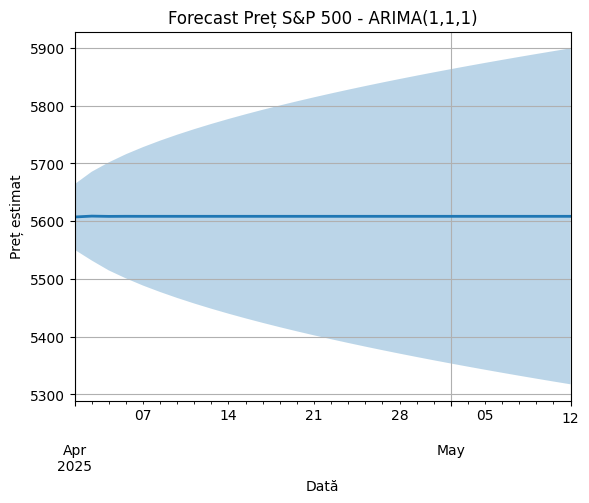

In [ ]:
# Model ARIMA(1,1,1) pentru preț (diferențiere o dată - d=1)
model_price = ARIMA(sp500, order=(1,1,1))
fitted_price = model_price.fit()

# Forecast pentru 30 zile viitoare
forecast_price = fitted_price.get_forecast(steps=30)
forecast_price_df = forecast_price.summary_frame()

# Generăm index de date viitoare
forecast_price_df.index = pd.date_range(start=sp500.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot
forecast_price_df['mean'].plot(title='Forecast Preț S&P 500 - ARIMA(1,1,1)', linewidth=2)
plt.fill_between(forecast_price_df.index, forecast_price_df['mean_ci_lower'], forecast_price_df['mean_ci_upper'], alpha=0.3)
plt.ylabel('Preț estimat')
plt.xlabel('Dată')
plt.grid(True)
plt.show()